# Deep Learning week - Day 1 - Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [0]:
from sklearn.datasets import make_moons

### Data generation
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

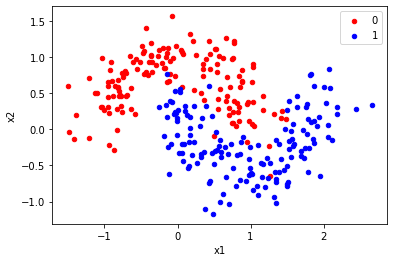

In [0]:
### This function allows to plot the two moons
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset`, by plotting the moons for different values

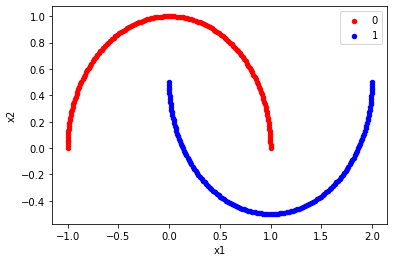

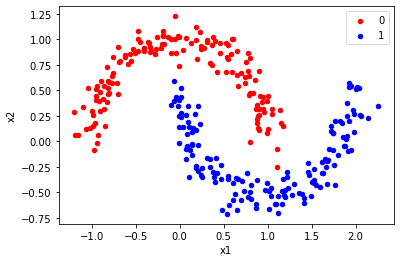

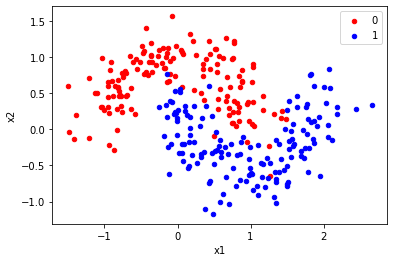

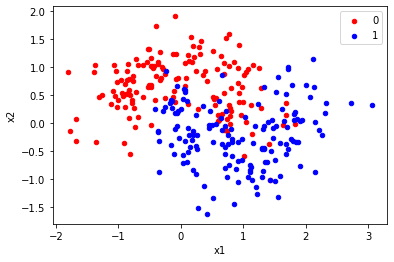

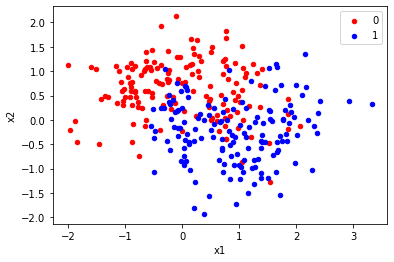

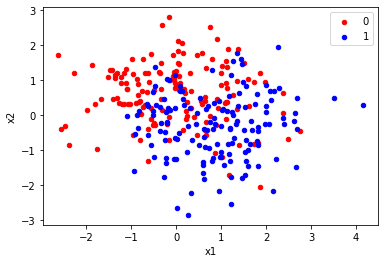

In [0]:
for noise in [0., 0.1, 0.25, 0.4, 0.5, 0.8]:
    X, y = make_moons(n_samples=300, noise=noise, random_state=0)
    plot_moons(X, y)

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [0]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

n_train = int(0.7*len(X))

X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
def initialize_model():
    ### Model architecture
    # $CHALLENGIFY_BEGIN
    model = models.Sequential()
    model.add(layers.Dense(5, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # $CHALLENGIFY_END
    ### Model optimization : Optimizer, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model()

2021-08-09 11:47:43.274030: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have already seen in Machine-Learning.

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [0]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=8,
                    verbose=0) # Try different verbose

2021-08-09 11:47:43.374867: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [0]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x1537f3d00>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.5625143051147461,
   0.5502560138702393,
   0.537708044052124,
   0.5244449377059937,
   0.5114349126815796,
   0.4985460937023163,
   0.48526695370674133,
   0.47320765256881714,
   0.461206316947937,
   0.45002955198287964,
   0.43938398361206055,
   0.4293445348739624,
   0.42000117897987366,
   0.41143959760665894,
   0.4037327766418457,
   0.3965478837490082,
   0.39005252718925476,
   0.38429996371269226,
   0.37900400161743164,
   0.3736768960952759,
   0.36933550238609314,
   0.3653776943683624,
   0.36157935857772827,
   0.35822635889053345,
   0.3550685942173004,
   0.3518902063369751,
   0.3490552306175232,
   0.34609153866767883,
   0.3435712456703186,
   0.34101182222366333,
   0.3387354910373688,
   0.33648622035980225,
   0.33443060517311096,
   0.33256420493125916,
   0.33074605464935

❓ Plot the history of the train loss using the following function

In [0]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

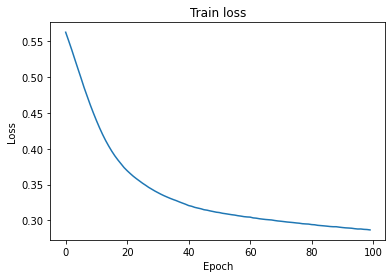

In [0]:
plot_history(history)

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [0]:
y_pred = model.predict(X_test)

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [0]:
model.evaluate(X_test, y_test, verbose=0)

[0.2686089277267456, 0.8666666746139526]

- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [0]:
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
accuracy

0.8666666746139526

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

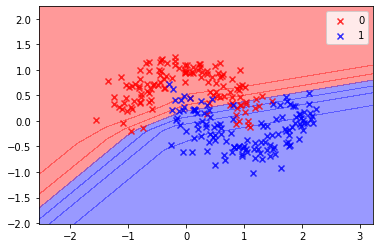

In [0]:
from utils.plots import plot_decision_regions
plot_decision_regions(X,y, model)

🧪 Test your code

In [0]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /Users/davywai/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/davywai/code/davydw/data-solutions/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: dash-1.20.0, anyio-3.2.1
collecting ... collected 1 item

tests/test_first_model.py::TestFirstModel::test_accuracy PASSED          [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master


## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

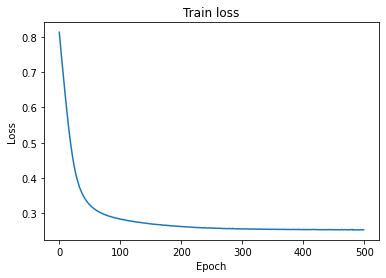

In [0]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=500, 
                    batch_size=8, 
                    verbose=0)

plot_history(history)

❓ Did the test accuracy improve?

In [0]:
results = model.evaluate(X_train, y_train, verbose=0)

print(results[1])

0.8971428275108337


Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [0]:
def initialize_model_2():
    ### Model architecture
    # $CHALLENGIFY_BEGIN
    model = models.Sequential()
    model.add(layers.Dense(20, input_dim=2, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # $CHALLENGIFY_END
    ### Model optimization : Optimized, loss and metric
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model?

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

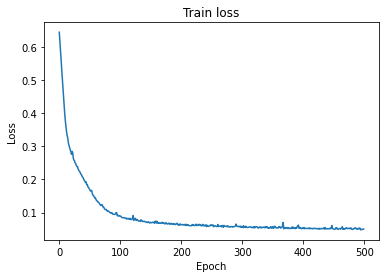

In [0]:
model = initialize_model_2()

history = model.fit(X_train, y_train, 
                    epochs=500, 
                    batch_size=8, 
                    verbose=0)

plot_history(history)

In [0]:
accuracy_deep = model.evaluate(X_test, y_test, verbose=0)[1]
accuracy_deep

0.9466666579246521

❓ Do you think we have overfitted on the noise? Check it out below

In [0]:
from utils.plots import plot_decision_regions

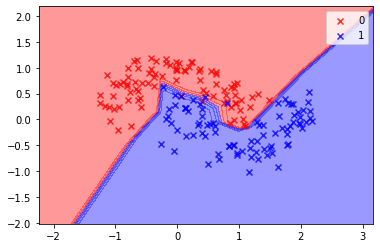

In [0]:
plot_decision_regions(X_train,y_train, model)

🧪 **Test your code**

In [0]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /Users/davywai/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/davywai/code/davydw/data-solutions/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: dash-1.20.0, anyio-3.2.1
collecting ... collected 1 item

tests/test_deeper_model.py::TestDeeperModel::test_accuracy PASSED        [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master


🏁 **Congratulations! Push and commmit this notebook before moving to the next**